In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset, concatenate_datasets
from itertools import combinations, product
from huggingface_hub import login as hf_login
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
ds = load_dataset("beanham/spatial_join_dataset_new")
train=ds['train']
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)
train_pd=train.to_pandas()

In [29]:
train

Dataset({
    features: ['sidewalk', 'road', 'min_angle', 'hausdorff_dist', 'euc_dist', 'max_area', 'label'],
    num_rows: 1285
})

## Angle Degrees

In [5]:
name='min_angle'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 0.9334472250957049
Mean: 24.396621109933744
Max: 89.99810678709866
STD: 34.205684724200076


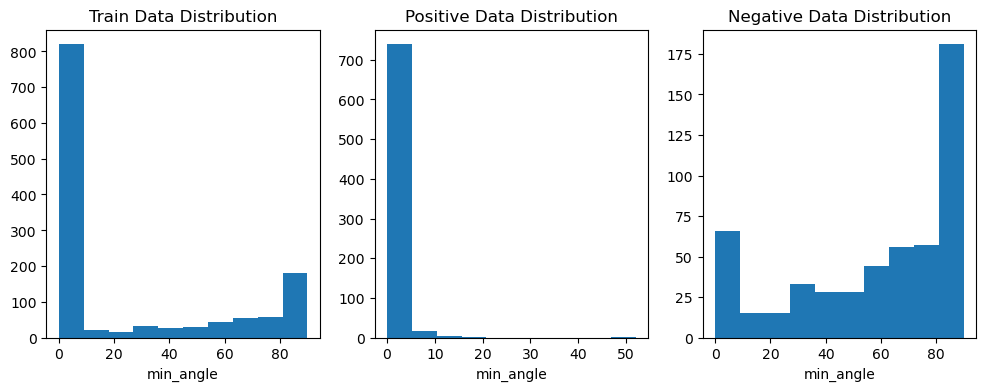

In [6]:
## almost all positive cases have small angles (<10 degrees)
## most negative cases have large angles, with some cases having small angles
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.hist(train[name])
plt.title('Train Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 2)
plt.hist(positive[name])
plt.title('Positive Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 3)
plt.hist(negative[name])
plt.title('Negative Data Distribution')
plt.xlabel(name)
pass

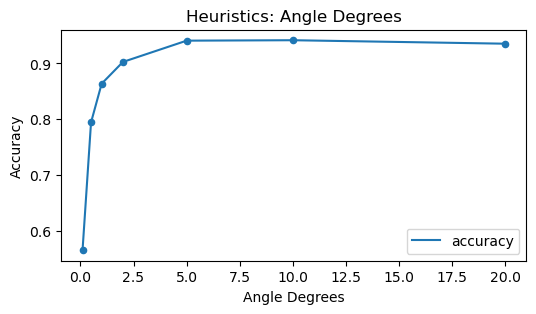

In [7]:
metrics=[0.1,0.5,1,2,5,10,20]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=20)
plt.title('Heuristics: Angle Degrees')
plt.ylabel('Accuracy')
plt.xlabel('Angle Degrees')
plt.legend()
pass    

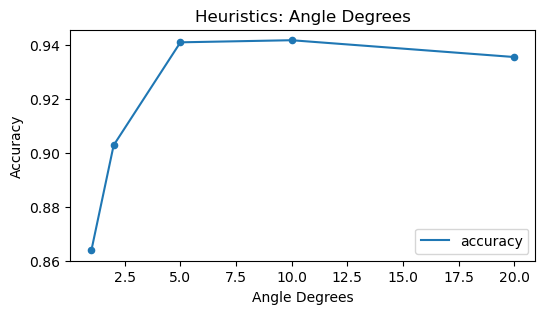

In [8]:
# final degrees: [1,2,5,10,20]
metrics=[1,2,5,10,20]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=20)
plt.title('Heuristics: Angle Degrees')
plt.ylabel('Accuracy')
plt.xlabel('Angle Degrees')
plt.legend()
pass    

In [12]:
degrees=[0.1,0.5,1,2,5,10,20]
for d in degrees:
    positive_metric=positive.filter(lambda x: x['min_angle']<=d)
    negative_metric=negative.filter(lambda x: x['min_angle']>d)
    print('----------------------------------------')
    print(f'Degree: {d}...')
    print(f'Total Samples: {len(positive_metric)+len(negative_metric)}')
    print(f'Positive Proportion: {len(positive_metric)/len(positive)}')
    print(f'Negative Proportion: {len(negative_metric)/len(negative)}')

----------------------------------------
Degree: 0.1...
Total Samples: 727
Positive Proportion: 0.2769028871391076
Negative Proportion: 0.9866156787762906
----------------------------------------
Degree: 0.5...
Total Samples: 1021
Positive Proportion: 0.6850393700787402
Negative Proportion: 0.9541108986615678
----------------------------------------
Degree: 1...
Total Samples: 1110
Positive Proportion: 0.8162729658792651
Negative Proportion: 0.9330783938814532
----------------------------------------
Degree: 2...
Total Samples: 1160
Positive Proportion: 0.8937007874015748
Negative Proportion: 0.9158699808795411
----------------------------------------
Degree: 5...
Total Samples: 1209
Positive Proportion: 0.968503937007874
Negative Proportion: 0.9005736137667304
----------------------------------------
Degree: 10...
Total Samples: 1210
Positive Proportion: 0.9908136482939632
Negative Proportion: 0.869980879541109
----------------------------------------
Degree: 20...
Total Samples: 1202

---

## Euclidean Distance

In [13]:
name='euc_dist'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 6.899784953323365
Mean: 5.563535652635348
Max: 9.993927682437771
STD: 3.6021187932956034


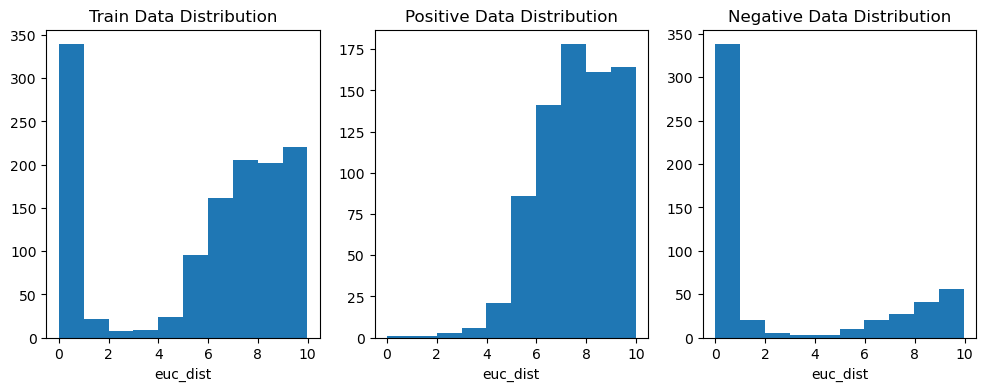

In [14]:
## almost all positive cases have larger distances
## most negative cases have smaller distances, with a few having large distances
plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
plt.hist(train[name])
plt.title('Train Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 2)
plt.hist(positive[name])
plt.title('Positive Data Distribution')
plt.xlabel(name)
plt.subplot(1, 3, 3)
plt.hist(negative[name])
plt.title('Negative Data Distribution')
plt.xlabel(name)
pass

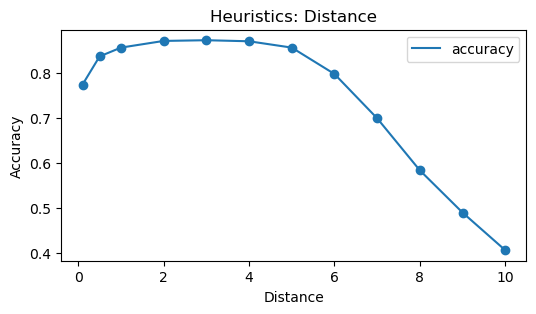

In [15]:
metrics=[0.1,0.5,1,2,3,4,5,6,7,8,9,10]
accuracy=[]
for m in metrics:
    pred=np.array(train['euc_dist'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Distance')
plt.ylabel('Accuracy')
plt.xlabel('Distance')
plt.legend()
pass    

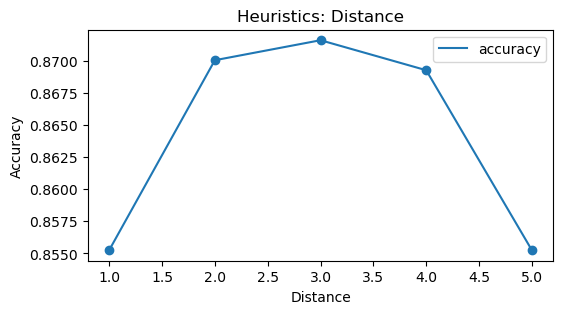

In [18]:
metrics=[1,2,3,4,5]
accuracy=[]
for m in metrics:
    pred=np.array(train['euc_dist'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Distance')
plt.ylabel('Accuracy')
plt.xlabel('Distance')
plt.legend()
pass    

In [20]:
distances=[1,2,3,4,5]
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)
for d in distances:
    positive_metric=positive.filter(lambda x: x['euc_dist']>=d)
    negative_metric=negative.filter(lambda x: x['euc_dist']<d)
    print('----------------------------------------')
    print(f'Distance: {d}...')
    print(f'Total Samples: {len(positive_metric)+len(negative_metric)}')
    print(f'Positive Proportion: {len(positive_metric)/len(positive)}')
    print(f'Negative Proportion: {len(negative_metric)/len(negative)}')

----------------------------------------
Distance: 1...
Total Samples: 1099
Positive Proportion: 0.9986876640419947
Negative Proportion: 0.6462715105162524
----------------------------------------
Distance: 2...
Total Samples: 1118
Positive Proportion: 0.9973753280839895
Negative Proportion: 0.6845124282982792
----------------------------------------
Distance: 3...
Total Samples: 1120
Positive Proportion: 0.9934383202099738
Negative Proportion: 0.6940726577437859
----------------------------------------
Distance: 4...
Total Samples: 1117
Positive Proportion: 0.9855643044619422
Negative Proportion: 0.6998087954110899
----------------------------------------
Distance: 5...
Total Samples: 1099
Positive Proportion: 0.958005249343832
Negative Proportion: 0.7055449330783938


----

## Area

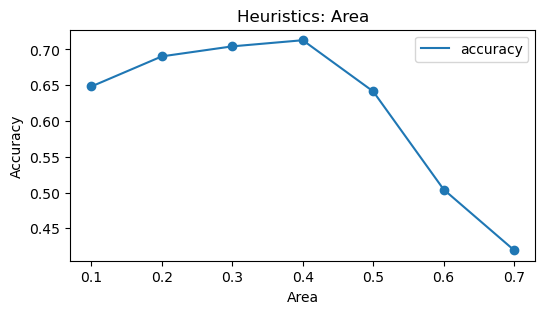

In [21]:
metrics=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
accuracy=[]
for m in metrics:
    pred=np.array(train['max_area'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Area')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.legend()
pass    

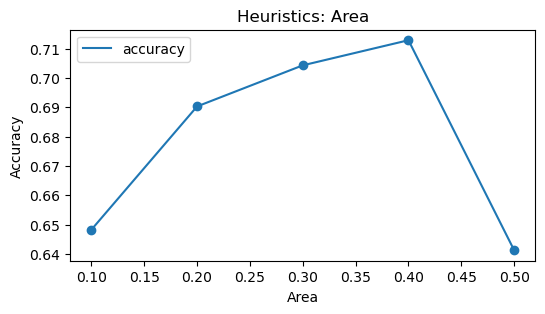

In [26]:
metrics=[0.1,0.2,0.3,0.4,0.5]
accuracy=[]
for m in metrics:
    pred=np.array(train['max_area'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,3))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy)
plt.title('Heuristics: Area')
plt.ylabel('Accuracy')
plt.xlabel('Area')
plt.legend()
pass    

----

## Appendix

spatial data intergration
- join task
- union task

todos:
- reduce the join task data points (~1200) -> to speed up the process
- need more heuristics for each task
- data responsiveness

heuristics

join task:
1) minimum angle
2) drop all interior points, connect start and end, threshold on angle
3) minimum distance
4) drop all interior points, connect start and end, threshold on distance.